## 4.2 Random Walks

Random walks are a gold mine for a wide variety of stochastic theory and practice. They are easy to explain, easy to code, and easy to misunderstand. In this section, we start out with the simplest imaginable random walk and then show how things can go wrong.

Let's examine the problem of the one-dimensional random walk.

- Consider a board game in which we move a counter either up or down on an infinite grid based on the flip of a coin.
- We start in the center of the grid at position $y_{t=0}=0$
- Each turn we flip a coin. If it is heads we move up one square, otherwise we move down.
- How will the counter behave over time? Let's simulate this in Python.
- First we create a variable $y$ to hold the current position.

In [1]:
y = 0

- Now we will generate a Bernoulli sequence representing the moves
- Each movement is a independent discrete random variable $\epsilon_t$ distributed with $p(\epsilon_t = 0) = \frac{1}{2}$ and $p(\epsilon_t = 1) = \frac{1}{2}$.
- We will generate a sequence $( \epsilon_1, \epsilon_2, \ldots, \epsilon_{t_{max}} )$ such movements, with $t_{max} = 100$.
- The time variable is also discrete, hence this is a discrete-time model.
- This means that time values can be represented as integers.

In [2]:
import numpy as np
from numpy.random import randint

max_t = 100
movements = randint(0, 2, size=max_t)
movements

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

- Each time we move the counter, we move it in the upwards direction if we flip a 1, and downwards for a 0.
- So we add 1 to $y_t$ for a 1, and subtract 1 for a 0.

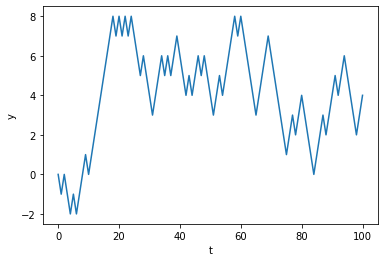

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint, normal, uniform
%matplotlib inline
max_t = 100
movements = randint(0, 2, size=max_t)
y = 0
values = [y]
for movement in movements:
    if movement == 1:
        y = y + 1
    else:
        y = y - 1
    values.append(y)
plt.xlabel('t')
plt.ylabel('y')
ax = plt.plot(values)

- Notice that the value of $y_t$ is simply the cumulative sum of movements randomly chosen from −1 or +1
- So if $p(\epsilon = -1) = \frac{1}{2}$ and $p(\epsilon = +1) = \frac{1}{2}$ then
- We can define our game as a simple **stochastic process** : $y_t = \sum_{t=1}^{t_{max}} \epsilon_t$
- In Python we can use the where() function to replace all zeros with −1.

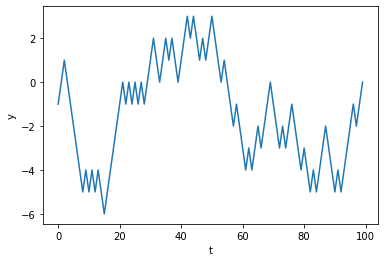

In [10]:
t_max = 100
random_numbers = randint(0, 2, size=t_max)
steps = np.where(random_numbers == 0, -1, +1)
values = []
for step in steps:
    y = y + step
    values.append(y)
plt.xlabel('t')
plt.ylabel('y')
ax = plt.plot(values)

- We can make our code more efficient by using the cumsum() function instead of a loop.
- This way we can work entirely with arrays.

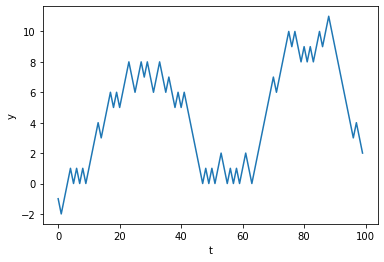

In [12]:
# Additive random-walk with arrays to improve efficiency
t_max = 100
random_numbers = randint(0, 2, size=t_max)
steps = np.where(random_numbers == 0, -1, +1)
values = np.cumsum(steps)
plt.xlabel('t')
plt.ylabel('y')
ax = plt.plot(values)

---
#### Exercise 4.2.1 - Reimplement the random walk problem using numpy.random.choice

---
### Multiple realisations of a stochastic process

- Because we are making use of random numbers, each time we execute this code we will obtain a different result.
- In the case of a random-walk, the result of the simulation is called a **path**.
- Each path is called a **realisation** of the model.
- We can generate multiple paths by using a 2-dimensional array (a matrix).
- Suppose we want $n=10$ paths.
- In Python we can pass two values for the size argument in the randint() function to specify the dimensions (rows and columns):

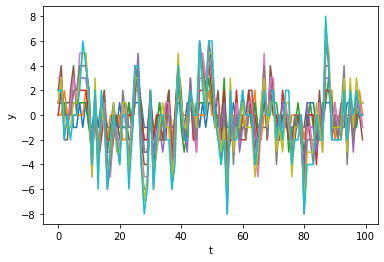

In [11]:
t_max = 100
n = 10
random_numbers = randint(0, 2, size=(t_max, n))
steps = np.where(random_numbers == 0, -1, +1)
# We can then tell cumsum() to sum the rows using the axis argument:
values = np.cumsum(steps, axis=1)
plt.xlabel('t')
plt.ylabel('y')
ax = plt.plot(values)

---
### Multiplicative Random Walks

- The series of values we have looked at do not closely resememble how security prices change over time.
- In order to obtain a more realistic model of how prices change over time, we need to multiply instead of add.
- Let $r_t$ denote an independent random variable distributed $r_t \sim N(0, \sigma)$
- Define a strictly positive intitial value $y_0 \in \mathbf{R}$; e.g. $y_0 = 10$
- Subsequent values are given by $y_t = y_{t-1} \times (1 + r_t)$
- We can write this as a cummulative product:
$$ y_t = y_0 \times \Pi_{t=1}^{t_{max}} (1 + r_t) $$
- This can be computed efficiently using the Python function cumprod.

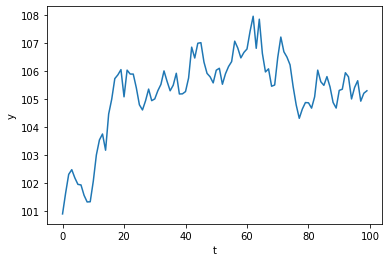

In [16]:
initial_value = 100.0
random_numbers = normal(size=t_max) * 0.005
multipliers = 1 + random_numbers
values = initial_value * np.cumprod(multipliers)
plt.xlabel('t')
plt.ylabel('y')
ax = plt.plot(values)

- Now let's plot the random perturbations

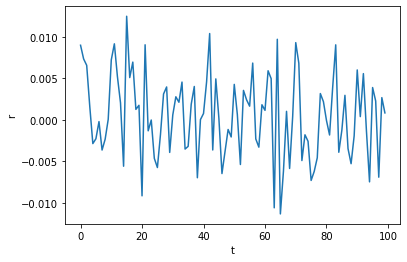

In [17]:
plt.xlabel('t')
plt.ylabel('r')
ax = plt.plot(random_numbers)

#### Gross return
- If we take $100 \times \epsilon_t$ , then these represent the percentage changes in the value at discrete time intervals.
- If the values represent prices that have been adjusted to incorporate dividends, then the multipliers are called simple **returns**.
- The gross return is obtained by adding 1.

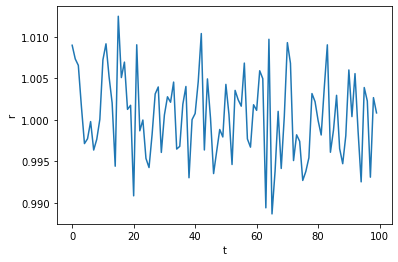

In [18]:
plt.xlabel('t')
plt.ylabel('r')
ax = plt.plot(random_numbers + 1)

---
#### Exercise 4.2.2 - Variant of random walk over time

Generate many realisations of the simple walk and plot the variance across realisations over time:

NameError: name 'random_walks' is not defined

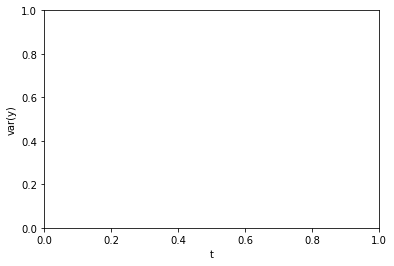

In [20]:
from numpy import var

#plt.xlabel('t')
#plt.ylabel('var(y)')
#ax = plt.plot(var(random_walks, axis=1))

---
#### Exercise 4.2.3 - Random walk distribution of paths

Generate many realisation of the simple walk and plot distribution curve.

<ipython-input-24-9b04de50a92c>:16: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  pl.histogram(h,normed=True)      #use this to draw histogram of your data


(array([0.02079002, 0.01386001, 0.02079002, 0.03465003, 0.04158004,
        0.06930007, 0.00693001, 0.04851005, 0.00693001, 0.00693001]),
 array([158. , 161.7, 165.4, 169.1, 172.8, 176.5, 180.2, 183.9, 187.6,
        191.3, 195. ]))

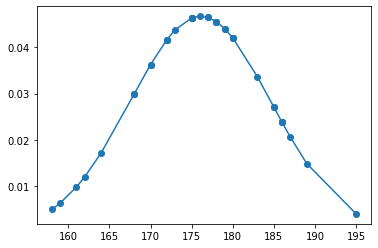

In [24]:
# sample code for fitting and plotting histogram
import numpy as np
import scipy.stats as stats
import pylab as pl

h = [186, 176, 158, 180, 186, 168, 168, 164, 178, 170, 189, 195, 172, 
     187, 180, 186, 185, 168, 179, 178, 183, 179, 170, 175, 186, 159,
     161, 178, 175, 185, 175, 162, 173, 172, 177, 175, 172, 177, 180]

h.sort()

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data


---
#### Exercise 4.2.4 - Beta decay simulation


In [22]:
from IPython.lib.display import Audio
import IPython.display as ipd
import numpy as np

framerate = 4410
play_time_seconds = 0.12

t = np.linspace(0, play_time_seconds, round(framerate*play_time_seconds))
audio_data = np.sin(2*np.pi*500*t)

def beep():
    a = Audio(audio_data, rate=framerate, autoplay=True)
    ipd.display(a)

In [25]:
import time as t

number = 100
lambda1 = 0.005
time_max = 100
# Time loop
for time in np.arange ( 0 , time_max + 1) :
    decay_atom = 0
    # Decay loop
    for atom in np.arange ( 1 , number + 1 ) :
        decay = np.random.random()
        if ( decay < lambda1 ) :
            decay_atom = decay_atom + 1 # A decay
            beep()
    number = number - decay_atom
    t.sleep(0.3)
    if number == 0: break;
print('Done')

Done


---
#### Execise 4.2.5 - Beta decay comparision

Using a large number of particles, show that the beta decay process from this random walk simulation is exponential decay.